<a href="https://colab.research.google.com/github/aghapygad336/MENA/blob/master/gtd_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
import pandas as pd
import numpy as np
from openpyxl.utils import dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
import math
from matplotlib import colors as cs
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing, metrics
from sklearn.feature_selection import SelectKBest
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**The Global Terrorism Database (GTD)** 
documents more than 190,000 international and domestic terrorist attacks that occurred worldwide since 1970. With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: Acts by non-state actors involving the threatened or actual use of illegal force or violence to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. Data collection is ongoing and updates are published annually at.

In [0]:
import pandas as pd
import numpy as np
data2015 = pd.read_csv('/content/drive/My Drive/MENA/2015.csv',encoding = "ISO-8859-1", engine = 'python')
data2016 = pd.read_csv('/content/drive/My Drive/MENA/2016.csv',encoding = "ISO-8859-1", engine = 'python')
data2017 = pd.read_csv('/content/drive/My Drive/MENA/2017.csv',encoding = "ISO-8859-1", engine = 'python')
happiness = data2015.append(data2016.append(data2017,sort=True),sort= True)
gtd = pd.read_csv('/content/drive/My Drive/MENA/golbal.csv',encoding = "ISO-8859-1", engine = 'python', usecols=[1,2,3,8,10,19,20,21,22,26,27,29,35,41,71,84,100,101,103,58])
gtd = gtd[(gtd['region_txt'] =='Middle East & North Africa') & (gtd['iyear'] > 2000)]


**Missing values** are representative of the messiness of real world data. There can be a multitude of reasons why they occur — ranging from human errors during data entry, incorrect sensor readings, to software bugs in the data processing pipeline.




**Categorial** Let’s start with the most simple thing you can do: removal. As mentioned before, while this is a quick solution, and might work in some cases when the proportion of missing values is relatively low (<10%), most of the time it will make you lose a ton of data. Imagine that just because of missing values in one of your features you have to drop the whole observation, even if the rest of the features are perfectly filled and informative!

**Numerical NaNs** A standard and often very good approach is to replace the missing values with mean, median or mode. For numerical values you should go with mean, and if there are some outliers try median (since it is much less sensitive to them).

In [0]:
# gtd missing values
numeric_ = gtd._get_numeric_data()
cat = gtd.select_dtypes(include='object')
mean_nan = numeric_.fillna(numeric_.mean()).dropna(axis=1, how='all')
cat_nan = cat.loc[:, cat.isnull().mean() <0.25]
gtd = mean_nan.join(cat_nan)


In [0]:
numeric_ = happiness._get_numeric_data()
cat = happiness.select_dtypes(include='object')
mean_nan = numeric_.fillna(numeric_.mean()).dropna(axis=1, how='all')
cat_nan = cat.loc[:, cat.isnull().mean() <0.25]
happiness = mean_nan.join(cat_nan)

Better encoding of categorical data can mean better model performance. In this series I’ll introduce you to a wide range of encoding options .


In [0]:
def encoding(dfData):    
    df = dfData.copy().select_dtypes(include='object')
    # print(df.columns)
    rows,cols = dfData.shape
    encodings = {}
    for col in df.columns:
        Region_nums = []
        Region_nums = df[col].unique()
        Region_nums = { Region_nums[i]: i for i in range(len(Region_nums)) }
        encodings.update({col:Region_nums})
        dfData[col].replace(Region_nums, inplace=True)
    return dfData,encodings

def get_by_value(dic,value):
    for key, val in dic.items():
        if val == value :
            return key    

In [0]:
gtd, gtd_encodings = encoding(gtd)
happiness, happiness_encodings = encoding(happiness)


Having about 600 terrorist group name (class labels), with some groups with less
than 10 attacks which may cause misleading results. You are required to reduce the
number of class labels to the 5 groups with max number of attacks

In [0]:
top_5 = gtd['gname'].value_counts()[1:6]
top_5 = [203,27,107,67,58]
gtd = gtd[gtd['gname'].isin(top_5)]


In [0]:

combinedData=pd.merge(gtd, happiness, left_on='country_txt', right_on='Country')
happiness, happiness_encodings = encoding(happiness)
combinedDataE, combinedData_encodings = encoding(combinedData)


In [0]:
def SplitTrainTes(dataSet):
    train_dataSet=dataSet[(dataSet['iyear'] >=2000) & (dataSet['iyear'] <= 2016)]
    test_dataSet=dataSet[dataSet['iyear'] ==2017]
    return train_dataSet,test_dataSet

**Training and Testing**

---


a. You are required to use the tuples of years from [2000. 2016] as training set
b. Tuples of year 2017 will be used as testing set.
c. We have 2 approaches in this assignment
i. Train and test using features of GTD only.
ii. Train and test using features of GTD and WHR combined.

In [0]:
train_GTD,test_GTD=SplitTrainTes(gtd)
train_Combined,test_Combined=SplitTrainTes(combinedData)

In [0]:
def splitX_SplitY(trainD,testD):
    x_train = trainD.drop("gname", axis=1)
    y_train = trainD["gname"]
    x_test = testD.drop("gname", axis=1)
    y_test = testD["gname"]
    return x_train,y_train,x_test,y_test

In [0]:
x_trainGTD,y_trainGTD,x_testGTD,y_testGTD=splitX_SplitY(train_GTD,test_GTD)
x_trainCombined,y_trainCombined,x_testCombined,y_testCombined=splitX_SplitY(train_Combined,test_Combined)


**The F measure** 

---
(F1 score or F score) is a measure of a test's accuracy of   **Classifier Models** and is defined as the weighted harmonic mean of the precision and recall of the test. 

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
def Fmeasure(estimator,x_train,y_train,x_test,y_test):
    y_pred_train = estimator.predict(x_train)
    y_pred_test = estimator.predict(x_test)
    accuracyF_Train=accuracy_score(y_train, y_pred_train)
    accuracyF_Test= accuracy_score(y_test, y_pred_test)
    print('Train Set Accuracy : ', accuracyF_Train)
    print('Train Set Precision : ', precision_score(y_train, y_pred_train, average='micro'))
    print('Train Set Recall : ', recall_score(y_train, y_pred_train, average='micro'))
    print('Train F-Score for each class : ', f1_score(y_train, y_pred_train, average='micro'))
    print('Train Mean F-Score for both classes : ', f1_score(y_train, y_pred_train, average='micro'))

    print('----------------------------------------------------------------------')
    print('Test Set Accuracy : ', accuracy_score(y_test, y_pred_test))
    print('Test Set Precision : ', precision_score(y_test, y_pred_test, average='micro'))
    print('Test Set Recall : ', recall_score(y_test, y_pred_test, average='micro'))
    print('Test F-Score for each class : ', f1_score(y_test, y_pred_test, average='micro'))
    print('Test Mean F-Score for both classes : ', f1_score(y_test, y_pred_test, average='micro'))

    print('----------------------------------------------------------------------')
    return accuracyF_Train,accuracyF_Test

In [0]:
def kNearestNeighborsFunction(x_train,y_train,x_test,y_test):
    neighbors = list(range(1, 30, 2))
    # empty list that will hold cv scores
    cv_scores = []
    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    mse = [1 - x for x in cv_scores]
    optimal_k = neighbors[mse.index(min(mse))]
    n=optimal_k
    print('Best N found at ' , n)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    testAccKNN,trainAccKNN=Fmeasure(knn,x_train,y_train,x_test,y_test)
    return testAccKNN,trainAccKNN


**The k-nearest neighbors (KNN)** algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.



In [16]:
knnAccuracytestGTD,KnnnAccuracytrainGTD=kNearestNeighborsFunction(x_trainGTD,y_trainGTD,x_testGTD,y_testGTD)

Best N found at  3
Train Set Accuracy :  0.9203720219136196
Train Set Precision :  0.9203720219136196
Train Set Recall :  0.9203720219136196
Train F-Score for each class :  0.9203720219136196
Train Mean F-Score for both classes :  0.9203720219136196
----------------------------------------------------------------------
Test Set Accuracy :  0.8993329290479078
Test Set Precision :  0.8993329290479078
Test Set Recall :  0.8993329290479078
Test F-Score for each class :  0.8993329290479077
Test Mean F-Score for both classes :  0.8993329290479077
----------------------------------------------------------------------


In [17]:
knnAccuracytestCombined,KnnnAccuracytrainCombined=kNearestNeighborsFunction(x_trainCombined,y_trainCombined,x_testCombined,y_testCombined)


Best N found at  21
Train Set Accuracy :  0.9180787361447318
Train Set Precision :  0.9180787361447318
Train Set Recall :  0.9180787361447318
Train F-Score for each class :  0.9180787361447318
Train Mean F-Score for both classes :  0.9180787361447318
----------------------------------------------------------------------
Test Set Accuracy :  0.9145610134087999
Test Set Precision :  0.9145610134087999
Test Set Recall :  0.9145610134087999
Test F-Score for each class :  0.9145610134088
Test Mean F-Score for both classes :  0.9145610134088
----------------------------------------------------------------------


**Decision Trees** A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning, which will be the main focus of this article.


In [0]:

def DT (x_train,y_train,x_test,y_test):
    ct_gini = DecisionTreeClassifier()
    ct_entropy = DecisionTreeClassifier(criterion="entropy")
    ct_gini = ct_gini.fit(x_train, y_train)
    ct_entropy = ct_entropy.fit(x_train, y_train)
    testAccDT_Entropy,trainAccDT_Entropy=Fmeasure(ct_entropy,x_train,y_train,x_test,y_test)
    testAccDT_Gini,trainAccDT_Gini=Fmeasure(ct_gini,x_train,y_train,x_test,y_test)
    return testAccDT_Entropy,trainAccDT_Entropy,testAccDT_Gini,trainAccDT_Gini

In [24]:
testAccgtdDT_Entropy,trainAccgtdDT_Entropy,testAccgtdDT_Gini,trainAccgtdDT_Gini=DT(x_trainGTD,y_trainGTD,x_testGTD,y_testGTD)

Train Set Accuracy :  0.9998725952350618
Train Set Precision :  0.9998725952350618
Train Set Recall :  0.9998725952350618
Train F-Score for each class :  0.9998725952350618
Train Mean F-Score for both classes :  0.9998725952350618
----------------------------------------------------------------------
Test Set Accuracy :  0.968465736810188
Test Set Precision :  0.968465736810188
Test Set Recall :  0.968465736810188
Test F-Score for each class :  0.968465736810188
Test Mean F-Score for both classes :  0.968465736810188
----------------------------------------------------------------------
Train Set Accuracy :  0.9998725952350618
Train Set Precision :  0.9998725952350618
Train Set Recall :  0.9998725952350618
Train F-Score for each class :  0.9998725952350618
Train Mean F-Score for both classes :  0.9998725952350618
----------------------------------------------------------------------
Test Set Accuracy :  0.9654335961188599
Test Set Precision :  0.9654335961188599
Test Set Recall :  0.96

In [0]:

testAccDTCombinedDT,trainAccDCombinedDT=DT(x_trainCombined,y_trainCombined,x_testCombined,y_testCombined)


Classification and prediction are two the most important aspects of Machine Learning and Naive Bayes is a simple but surprisingly powerful algorithm for predictive modeling. 
Naive Bayes is among one of the simplest, but most powerful algorithms for classification based on Bayes' Theorem with an assumption of independence among predictors. The Naive Bayes model is easy to build and particularly useful for very large data sets. This part to this algorithm: **Naive Bayes**


In [0]:
def NB(x_train,y_train,x_test,y_test):
    nb = GaussianNB()
    nb = nb.fit(x_train, y_train)
    testAccNB,trainAccNB=Fmeasure(nb,x_train,y_train,x_test,y_test)
    return testAccNB,trainAccNB

In [28]:
testAccDTgtdNB,trainAccDgtdNB=NB(x_trainGTD,y_trainGTD,x_testGTD,y_testGTD)

Train Set Accuracy :  0.39482736654350875
Train Set Precision :  0.39482736654350875
Train Set Recall :  0.39482736654350875
Train F-Score for each class :  0.39482736654350875
Train Mean F-Score for both classes :  0.39482736654350875
----------------------------------------------------------------------
Test Set Accuracy :  0.39357186173438446
Test Set Precision :  0.39357186173438446
Test Set Recall :  0.39357186173438446
Test F-Score for each class :  0.39357186173438446
Test Mean F-Score for both classes :  0.39357186173438446
----------------------------------------------------------------------


In [0]:

testAccDTCombinedNB,trainAccDCombinedNB=NB(x_trainCombined,y_trainCombined,x_testCombined,y_testCombined)


**Logistic Regression** is a ‘Statistical Learning’ technique categorized in ‘Supervised’ Machine Learning (ML) methods dedicated to ‘Classification’ tasks. It has gained a tremendous reputation for last two decades especially in financial sector due to its prominent ability of detecting defaulters. A general usage schema of…


In [0]:
def LR(x_train,y_train,x_test,y_test):
    import warnings
    warnings.filterwarnings("ignore")

    grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # l1 lasso l2 ridge
    logreg = LogisticRegression()
    logreg_cv = GridSearchCV(logreg, grid, cv=10)
    logreg_cv.fit(x_train, y_train)
    print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
    testAccLR,trainAccLR=Fmeasure(logreg_cv,x_train,y_train,x_test,y_test)
    print("accuracy :", logreg_cv.best_score_)
    return testAccLR,trainAccLR

In [30]:
testAccLR_gtd,trainAccLR_gtd=LR(x_trainGTD,y_trainGTD,x_testGTD,y_testGTD)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
Train Set Accuracy :  0.7789527328322079
Train Set Precision :  0.7789527328322079
Train Set Recall :  0.7789527328322079
Train F-Score for each class :  0.7789527328322079
Train Mean F-Score for both classes :  0.7789527328322079
----------------------------------------------------------------------
Test Set Accuracy :  0.8993329290479078
Test Set Precision :  0.8993329290479078
Test Set Recall :  0.8993329290479078
Test F-Score for each class :  0.8993329290479077
Test Mean F-Score for both classes :  0.8993329290479077
----------------------------------------------------------------------
accuracy : 0.7677411135176455


In [0]:
def AB(x_train,y_train,x_test,y_test):
    import warnings
    warnings.filterwarnings("ignore")

    param_grid = {
        'learning_rate': [.1, .2, .3, .4, .5],

        'n_estimators': [50, 100, 150, 200, 250]
    }

    classifier = AdaBoostClassifier()
    grid_Search = GridSearchCV(classifier, param_grid=param_grid)
    kk = grid_Search.fit(x_train, y_train)
    testAccAB,trainAccAB= Fmeasure(kk,x_train,y_train,x_test,y_test)
    return testAccAB,trainAccAB

In [32]:
testAccAB_gtd,trainAccAB_gtd=AB(x_trainGTD,y_trainGTD,x_testGTD,y_testGTD)

Train Set Accuracy :  0.909032997834119
Train Set Precision :  0.909032997834119
Train Set Recall :  0.909032997834119
Train F-Score for each class :  0.909032997834119
Train Mean F-Score for both classes :  0.909032997834119
----------------------------------------------------------------------
Test Set Accuracy :  0.9563371740448757
Test Set Precision :  0.9563371740448757
Test Set Recall :  0.9563371740448757
Test F-Score for each class :  0.9563371740448757
Test Mean F-Score for both classes :  0.9563371740448757
----------------------------------------------------------------------


In [0]:
testAccAB_combined,trainAccAB_combined=AB(x_trainCombined,y_trainCombined,x_testCombined,y_testCombined)


In [0]:
def SVM(x_train,y_train,x_test,y_test):
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='poly', degree=8)
    svclassifier.fit(x_train, y_train)
    testAccAB_SVM,trainAccAB_SVM=Fmeasure(svclassifier,x_train,y_train,x_test,y_test)
    return testAccAB_SVM,trainAccAB_SVM


In [34]:
testAccAB_gtd_SVM,trainAccAB_gtd_SVM=SVM(x_trainGTD,y_trainGTD,x_testGTD,y_testGTD)

Train Set Accuracy :  0.5441457510510893
Train Set Precision :  0.5441457510510893
Train Set Recall :  0.5441457510510893
Train F-Score for each class :  0.5441457510510893
Train Mean F-Score for both classes :  0.5441457510510893
----------------------------------------------------------------------
Test Set Accuracy :  0.7835051546391752
Test Set Precision :  0.7835051546391752
Test Set Recall :  0.7835051546391752
Test F-Score for each class :  0.7835051546391752
Test Mean F-Score for both classes :  0.7835051546391752
----------------------------------------------------------------------


In [0]:
fScoreTest=[knnAccuracytestGTD,testAccgtdDT_Entropy,testAccgtdDT_Gini,testAccDTgtdNB,testAccLR_gtd,testAccAB_gtd,testAccAB_gtd_SVM]
fScoreTrain=[KnnnAccuracytrainGTD,trainAccgtdDT_Entropy,trainAccgtdDT_Gini,trainAccDgtdNB,trainAccLR_gtd,trainAccAB_gtd,trainAccAB_gtd_SVM]

**Ploting**

In [0]:
def plotFmeasure(fScoreTrain,fScoreTest):
    model_names = ['knn','decision tree entropy','decision tree gini ','Naive Bayes','LR','AB','SVM']
   
    
    

    plt.figure()
    plt.scatter(fScoreTrain,model_names,c='blue',label='fScore Train')
    plt.scatter(fScoreTest,model_names,c='red',label='fScore Test')
    plt.xlabel('Fmeasure')
    plt.ylabel('Model ')
    plt.show()

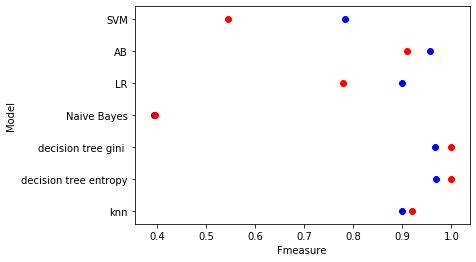

In [47]:
plotFmeasure(fScoreTrain,fScoreTest)